Downloading datasets and importing required libraries

In [2]:
!gdown "1RhkS8-1GKYPY6rvR8WopWsAwzd3-WHob"
!gdown "1ei4jSbQYjp1EQwRCRWwaPaAp5S4ME5yo"

Downloading...
From: https://drive.google.com/uc?id=1RhkS8-1GKYPY6rvR8WopWsAwzd3-WHob
To: /content/Pytorch Data.json
100% 6.67M/6.67M [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ei4jSbQYjp1EQwRCRWwaPaAp5S4ME5yo
To: /content/Tensorflow Data.json
100% 4.48M/4.48M [00:00<00:00, 49.5MB/s]


In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
pytorch_file = open("/content/Pytorch Data.json")
tensorflow_file = open("/content/Tensorflow Data.json")
pytorch_data = json.load(pytorch_file)
tensorflow_data = json.load(tensorflow_file)

## Preprocessing

In [5]:
pytorch_df = pd.json_normalize(pytorch_data)
tensorflow_df = pd.json_normalize(tensorflow_data)

In [6]:
tensorflow_df.head()

,issue_url,num_of_comments,labels,assignees,reviewers,participants,status,description_code_exists
0,[https://github.com/tensorflow/tensorflow/issu...,[10],"[comp:data,stat:awaiting response,TF 2.3,type:...",[rmothukuru],[],"[jackd,jsimsa,tensorflowbutler,rmothukuru,amah...",[Closed],[1]
1,[https://github.com/tensorflow/tensorflow/issu...,[4],"[comp:lite,comp:micro,stat:awaiting tensorflow...",[advaitjain],[],"[advaitjain,bhavikapanara,tensorflowbutler,dip...",[Closed],[0]
2,[https://github.com/tensorflow/tensorflow/issu...,[3],"[stat:awaiting response,type:bug]",[Saduf2019],[],"[GF-Huang,Saduf2019]",[Closed],[0]
3,[https://github.com/tensorflow/tensorflow/issu...,[1],[type:others],[amahendrakar],[],"[rhr407,amahendrakar]",[Closed],[1]
4,[https://github.com/tensorflow/tensorflow/issu...,[4],"[comp:lite,type:support]",[ravikyram],[],"[abattery,cookingbear,ravikyram]",[Closed],[0]


As all columns are loaded as lists, we need to convert them to a proper data structure so they would be easier to use.

In [9]:
def clean_df(df):
  df_cp = df.copy()
  df_cp["num_of_comments"] = df["num_of_comments"].apply(lambda x: x[0])
  df_cp["issue_url"] = df["issue_url"].apply(lambda x: x[0])
  df_cp["description_code_exists"] = df["description_code_exists"].apply(lambda x: x[0])
  df_cp["status"] = df["status"].apply(lambda x: x[0])
  df_cp["is_bug"] = df['labels'].apply(lambda x: "type:bug" in x[0].split(','))
  df_cp["number_of_participants"] = df["participants"].apply(lambda s: len(s[0].split(',')))
  df_cp["number_of_assignees"] = df["assignees"].apply(lambda x: len(x[0].split(',')))
  df_cp["number_of_reviewers"] = df["reviewers"].apply(lambda x: len(x[0].split(',')))
  return df_cp

In [10]:
tensorflow_df_clean = clean_df(tensorflow_df)
pytorch_df_clean = clean_df(pytorch_df)


## Status of The issues

Text(0.5, 1.0, 'distribution of status in tensorflow repository')

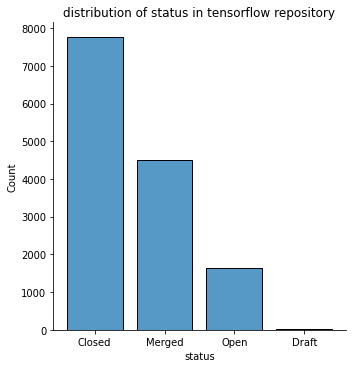

In [11]:
sns.displot(tensorflow_df_clean, x="status", shrink=.8)
plt.title("distribution of status in tensorflow repository")

Text(0.5, 1.0, 'distribution of status in pytorch repository')

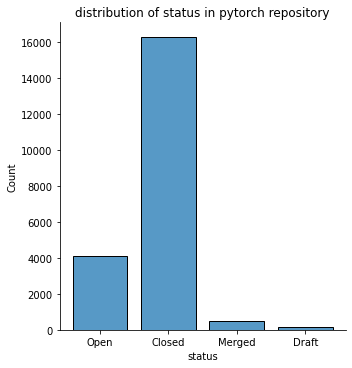

In [12]:
sns.displot(pytorch_df_clean, x="status", shrink=.8)
plt.title("distribution of status in pytorch repository")

In [13]:
pytorch_df_clean['framework'] = pd.Series(['Pytorch' for i in range(pytorch_df_clean.shape[0])])
tensorflow_df_clean['framework'] = pd.Series(['Tensorflow' for i in range(tensorflow_df_clean.shape[0])])
combined_df = pd.concat([pytorch_df_clean, tensorflow_df_clean])
combined_df.reset_index(drop=True, inplace = True)

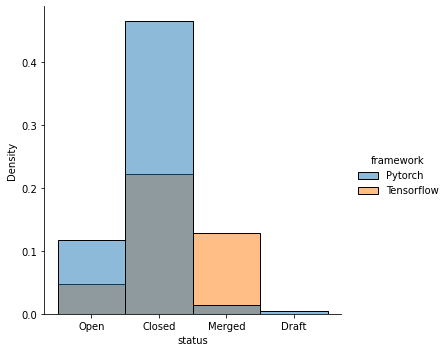

In [14]:
sns.displot(combined_df, x="status", hue="framework",stat="density")

The plot clearly shows that the process of bug fixing in tensorflow is not as fast as pytorch given their high rate of issues with 'merged' status waiting for the final review.

## Num of Comments

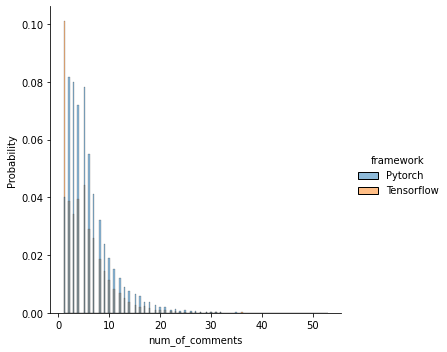

In [15]:
sns.displot(combined_df, x="num_of_comments", hue="framework",stat="probability")

All the comments on an issue, even the ones written by the creator of the issue in order to provide a description for the issue, are counted in the "num_of_comments" column. 

The High number of issues with a single comment in Tensorflow means contributors are not able to leave any response to the suggested changes or bug reports. Despite the high number of issues in the last two years, Pytorch contributors have been more answerable.

In [16]:
pytorch_num_of_comments_avg = pytorch_df_clean["num_of_comments"].sum(axis = 0) / pytorch_df_clean.shape[0]
tensorflow_num_of_comments_avg = tensorflow_df_clean["num_of_comments"].sum(axis = 0) / tensorflow_df_clean.shape[0]
print("average number of comments for each issue on tensorflow: ", tensorflow_num_of_comments_avg)
print("average number of comments for each issue on pytorch: ", pytorch_num_of_comments_avg)

average number of comments for each issue on tensorflow:  5.1385498923187365
average number of comments for each issue on pytorch:  5.992588721554468


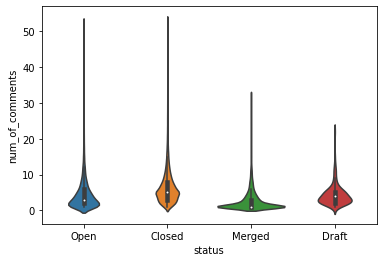

In [17]:
sns.violinplot(data=combined_df, x="status", y="num_of_comments")

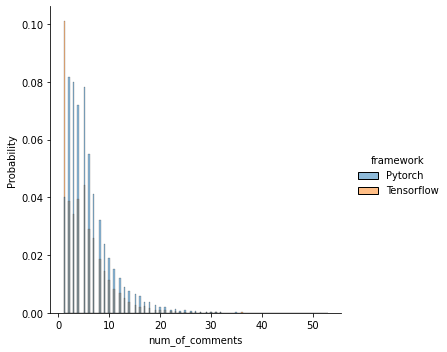

In [18]:
sns.displot(combined_df, x="num_of_comments", hue="framework",stat="probability")

### Number of Assignees, Reviewers, and Prticipants

Text(0.5, 1.0, "distribution of issues' participants on tensorflow")

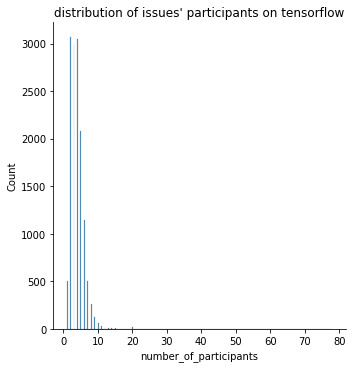

In [19]:
sns.displot(tensorflow_df_clean, x="number_of_participants")
plt.title("distribution of issues' participants on tensorflow")

percentage of issues on tensorflow with less than 20 participants:  0.997056712132089


Text(0.5, 1.0, 'distribution of issues with less than 20 participants on tensorflow')

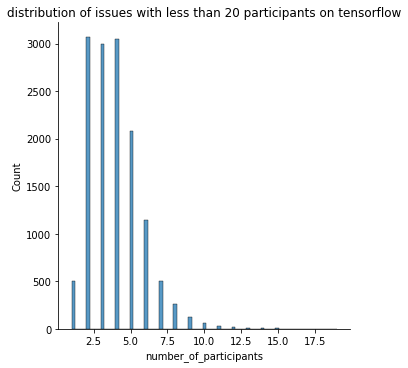

In [20]:
print("percentage of issues on tensorflow with less than 20 participants: ", tensorflow_df_clean[tensorflow_df_clean['number_of_participants']<20].shape[0]/tensorflow_df_clean.shape[0])
sns.displot(tensorflow_df_clean[tensorflow_df_clean['number_of_participants']<20], x="number_of_participants")
plt.title("distribution of issues with less than 20 participants on tensorflow")

Text(0.5, 1.0, "distribution of issues' participants on pytorch")

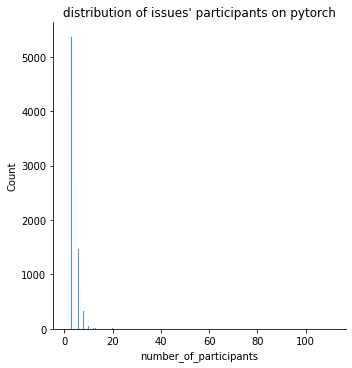

In [21]:
sns.displot(pytorch_df_clean, x="number_of_participants")
plt.title("distribution of issues' participants on pytorch")

percentage of issues on pytorch with less than 20 participants:  0.9970544918998527


Text(0.5, 1.0, 'distribution of issues with less than 20 participants on pytorch')

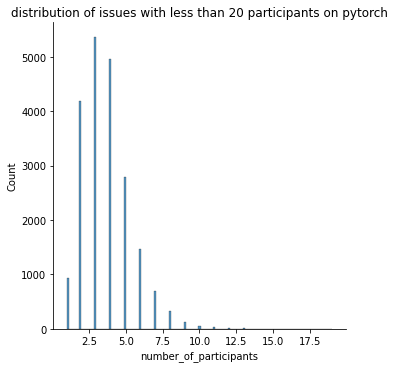

In [22]:
print("percentage of issues on pytorch with less than 20 participants: ", pytorch_df_clean[pytorch_df_clean['number_of_participants']<20].shape[0]/pytorch_df_clean.shape[0])
sns.displot(pytorch_df_clean[pytorch_df_clean['number_of_participants']<20], x="number_of_participants")
plt.title("distribution of issues with less than 20 participants on pytorch")

In [23]:
pytorch_num_of_participants_avg = pytorch_df_clean["number_of_participants"].sum(axis = 0) / pytorch_df_clean.shape[0]
tensorflow_num_of_participants_avg = tensorflow_df_clean["number_of_participants"].sum(axis=0)/ tensorflow_df_clean.shape[0]
print("average number of participants for each issue on tensorflow: ", tensorflow_num_of_participants_avg)
print("average number of participants for each issue on pytorch: ", pytorch_num_of_participants_avg)

average number of participants for each issue on tensorflow:  3.9518305814788226
average number of participants for each issue on pytorch:  3.8746258729630862


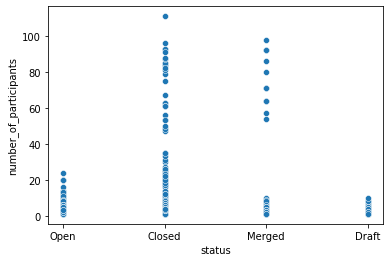

In [24]:
sns.scatterplot(data=pytorch_df_clean, x='status', y= "number_of_participants")

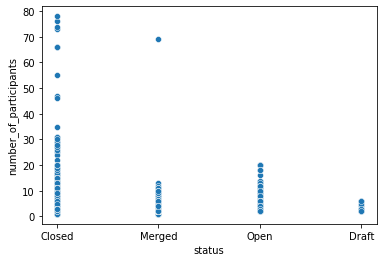

In [25]:
sns.scatterplot(data=tensorflow_df_clean, x='status', y= "number_of_participants")

As you can see, as the number of participants in discussions about an issue increases, there is a high probability for that issue to be closed or merged.

## Labels

In [56]:
cumulative_labels = []
for ind, row in tensorflow_df_clean.iterrows():
  cumulative_labels.extend(row['labels'])

Text(0.5, 1.0, 'most frequent labels in tensorflow repository')

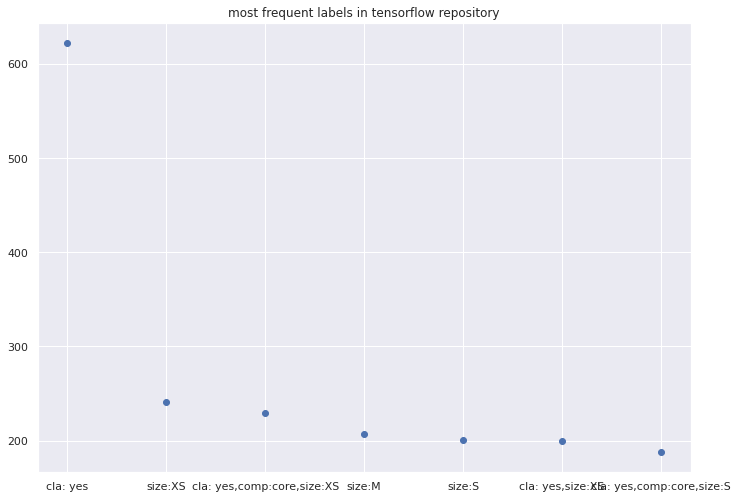

In [57]:
from collections import Counter

label_counts = Counter(cumulative_labels)
frequent_labels = [(value, count) for value, count in label_counts.most_common() if count > 150 and value != '']
plt.scatter(*zip(*frequent_labels))
plt.title("most frequent labels in tensorflow repository")

In [58]:
cumulative_labels = []
for ind, row in pytorch_df_clean.iterrows():
  cumulative_labels.extend(row['labels'])

Text(0.5, 1.0, 'most frequent labels in tensorflow repository')

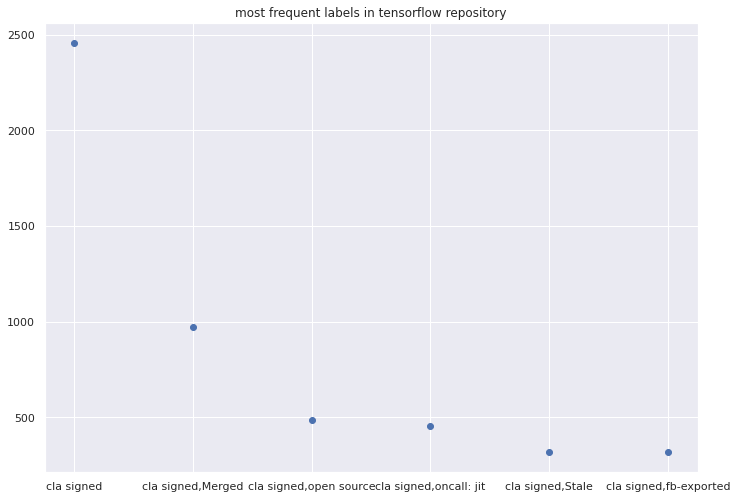

In [64]:
label_counts = Counter(cumulative_labels)
frequent_labels = [(value, count) for value, count in label_counts.most_common() if count > 310 and value != '']
plt.scatter(*zip(*frequent_labels))
plt.title("most frequent labels in pytorch repository")

## Issue Description contains Code

In [29]:
contain_code_open = combined_df[(combined_df["description_code_exists"] == 1) & (combined_df["is_bug"])& (combined_df["status"] == 'Open')].shape[0] / combined_df[(combined_df["is_bug"])&(combined_df['status']=='Open')].shape[0]
contain_code_closed = combined_df[(combined_df["description_code_exists"] == 1) & (combined_df["is_bug"])& (combined_df["status"] == 'Closed')].shape[0] / combined_df[(combined_df["is_bug"])&(combined_df['status']=='Closed')].shape[0]
print("percentage of Open bug issues with a description containing code: ", contain_code_open*100)
print("percentage of Closed bug issues with a description containing code: ", contain_code_closed*100)

percentage of Open bug issues with a description containing code:  54.50381679389314
percentage of Closed bug issues with a description containing code:  37.14658547194432


We first hypothesized that adding code the description of bug issues may make the issue easier to understand for contributors. But, to our surprise, it is not the case. The issues containing code revealing the failure are less likely to become closed.